
    1.187
--------------
s^2 + 0.1361 s

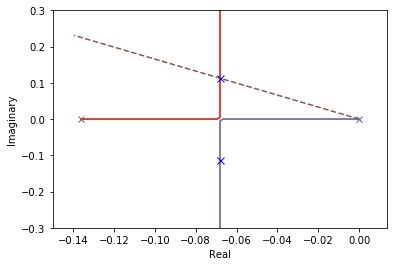

In [210]:
import control
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

def plot_point(point, angle, length):
    '''
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = length * math.sin(angle)
    endx = -length * math.cos(angle)

    return [x, endx], [y, endy]


A, T = 8.719908846328394, 7.34749253427418

P = control.tf([A/T], [1, 1/T, 0])
zeta = 0.5169308662051556
r,l = control.root_locus(P, np.linspace(0,0.25,10000))
plt.plot(r.real, r.imag)
zx,zy = plot_point((0,0), math.acos(zeta), 0.27)
plt.plot(zx, zy, '--')
plt.plot([-0.06805]*2, [0.1127,-0.1127], 'bx', markersize=7)
plt.xlim([-0.15,0.0138])
plt.ylim([-0.3,0.3])
plt.savefig("rlplant.png", dpi=200)

plt.plot()

G = control.tf([0.014602391244245873], [1])
control.series(G, P)
G2 = control.tf([17.205131, 17.205131], [1, 6])
control.series(G2, P)
P

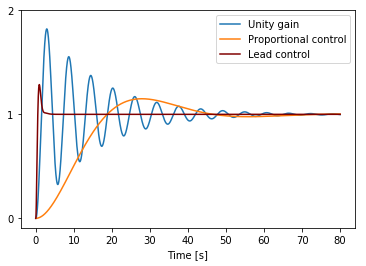

In [209]:
plt.clf()
s,r = control.step_response(control.feedback(P), np.linspace(0,80,10000))
plt.plot(s,r, label="Unity gain")
s,r = control.step_response(control.feedback(control.series(G,P)), np.linspace(0,80,10000))
plt.plot(s,r, label="Proportional control")
s,r = control.step_response(control.feedback(control.series(G2,P)), np.linspace(0,80,10000))
plt.plot(s,r, label="Lead control", c='maroon')
plt.xlabel("Time [s]")
plt.yticks([0,1,2])
plt.legend(loc='upper right')
plt.savefig("srplant.png", dpi=200)